In [25]:
import pandas as pd

In [26]:
# SOURCE : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv") 

In [27]:
df # 5110 rows × 12 columns

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [30]:
df.drop(columns = ["id"], inplace = True)

# EDA

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

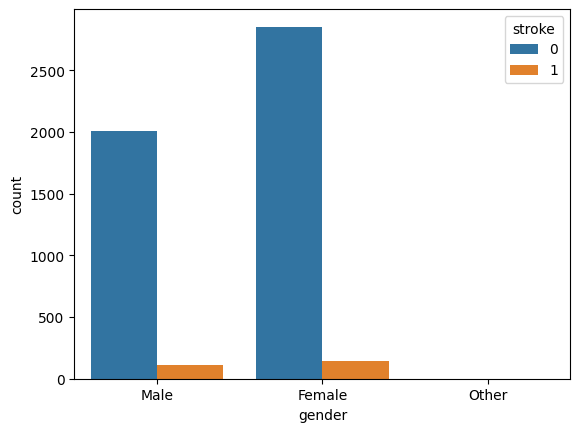

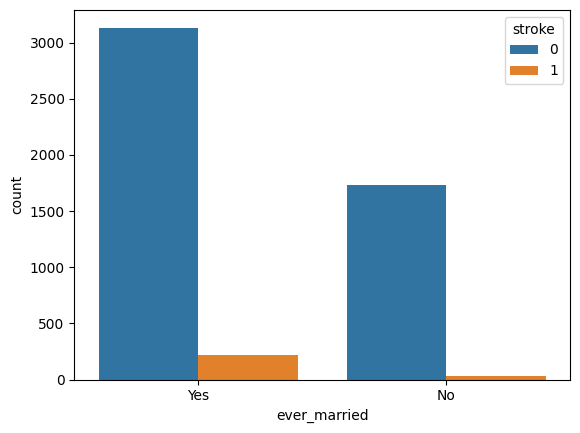

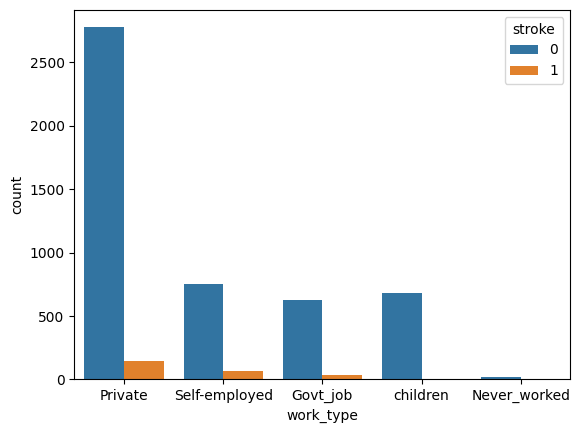

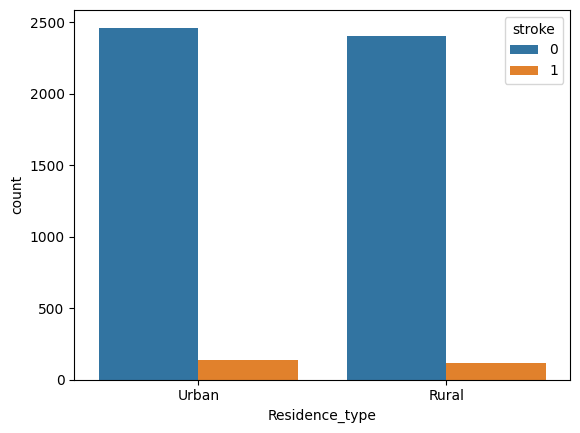

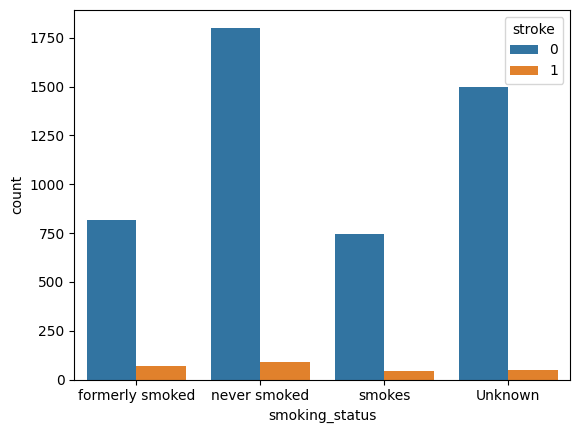

In [14]:
# Plotting cathegorical data
cat_col = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for cat in cat_col:
    sns.countplot(data=df, x=cat, hue = "stroke")
    plt.show()

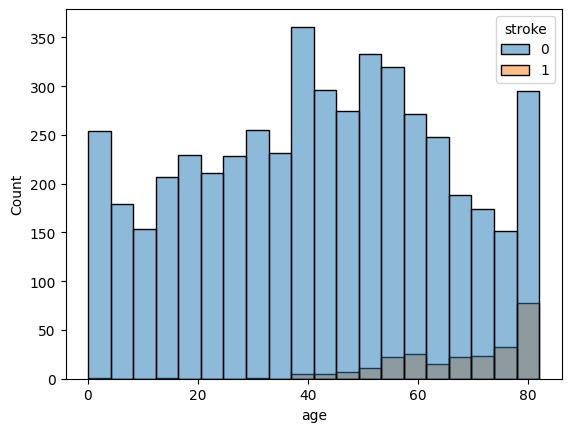

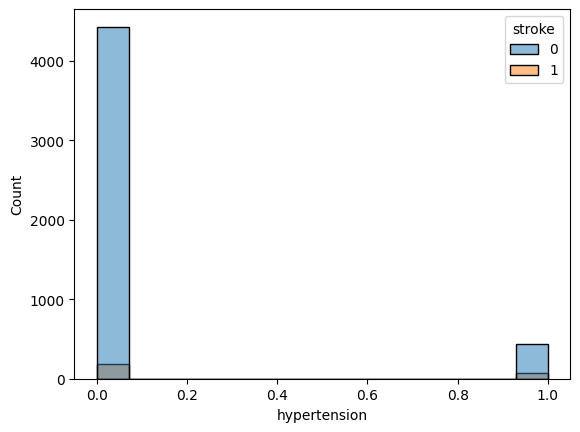

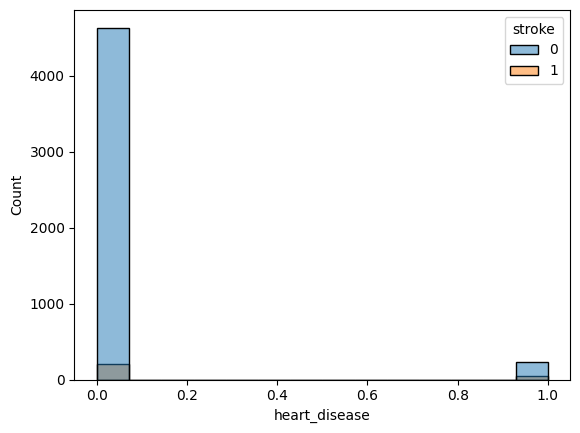

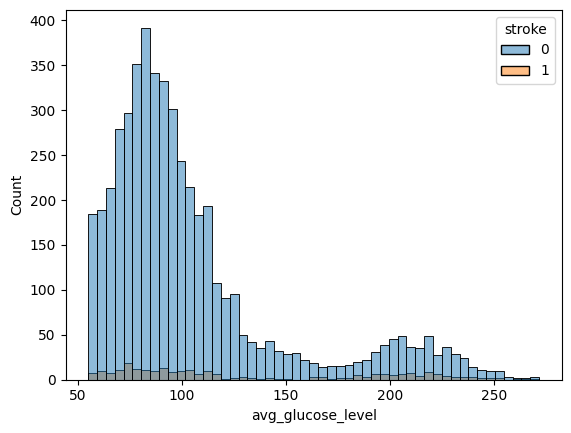

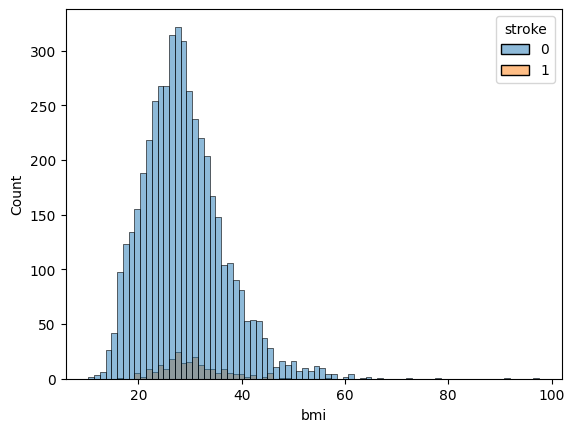

In [15]:
num_col = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

for num in num_col:
    sns.histplot(data=df, x=num, hue='stroke')
    plt.show()

<Axes: xlabel='na_cat', ylabel='Count'>

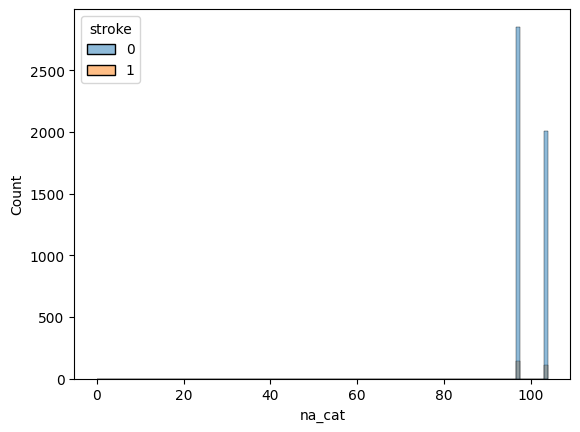

In [23]:
## dealing with missing value --> BMI column
df['na_cat'] = df.bmi.isnull().groupby([df['gender']]).transform('sum').astype(int)

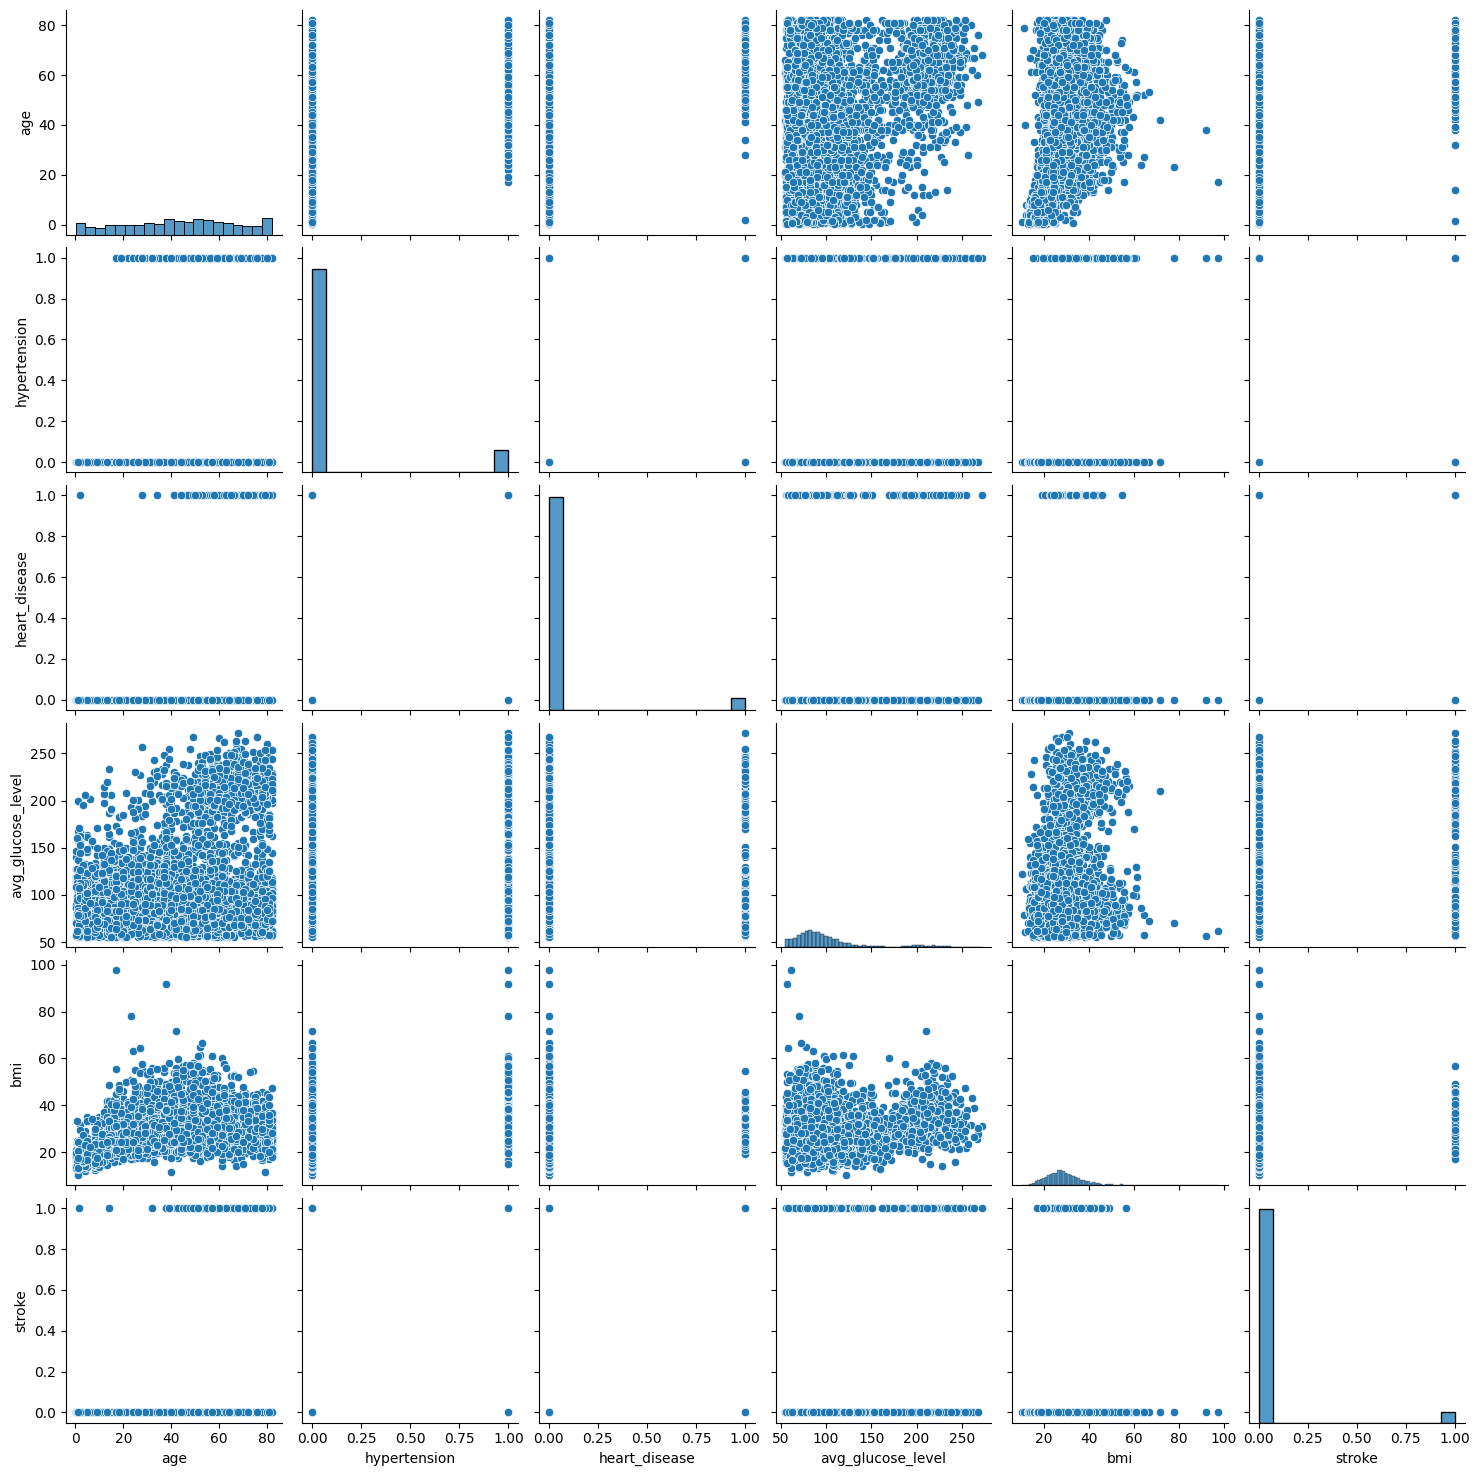

In [32]:
sns.pairplot(df)

In [33]:
# Check for outliers --> no outliers

## Machine learning

In [ ]:
# Split train and test

In [ ]:
# Impute missing data

In [ ]:
# 